<a href="https://colab.research.google.com/github/sammainahkinya1404/Tensorflow-CNN-model/blob/main/Project001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras
import os
import matplotlib.pyplot as plt
import numpy as np
import pathlib


In [ ]:
img_height,img_width=50,50
batch_size= 20
train_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Diseazes/train',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)
val_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Diseazes/validation',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)
test_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Diseazes/test',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)
    
    


Found 3547 files belonging to 4 classes.
Found 522 files belonging to 4 classes.
Found 1629 files belonging to 4 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


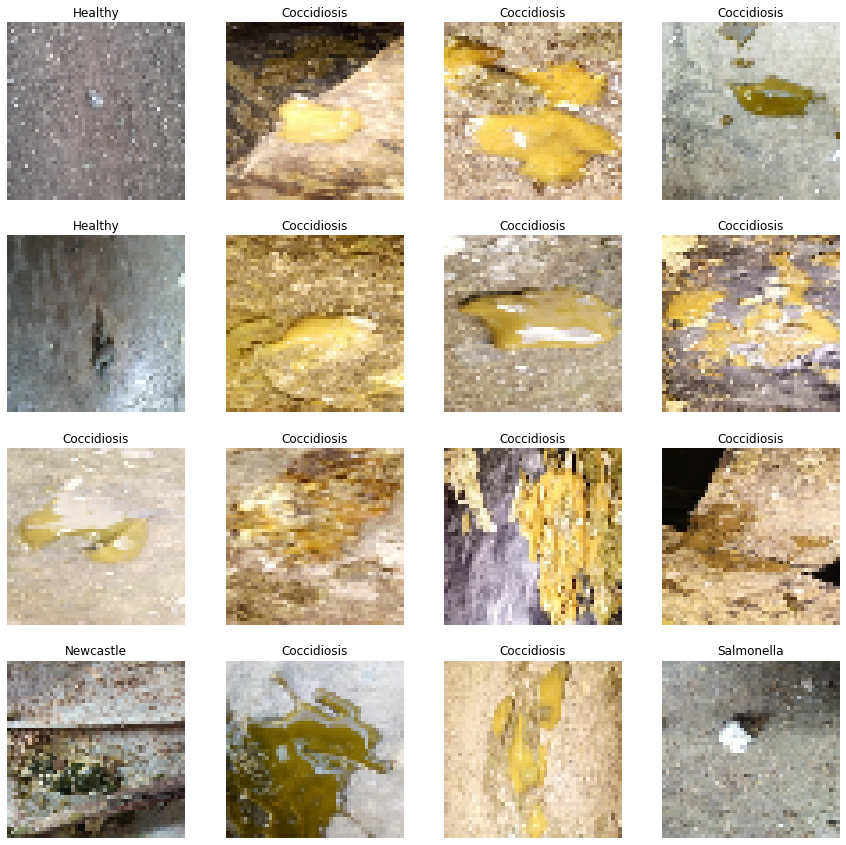

In [ ]:
class_names=["Coccidiosis","Healthy","Newcastle","Salmonella"]
plt.figure(figsize=(15,15))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
# Data Augmentattion
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

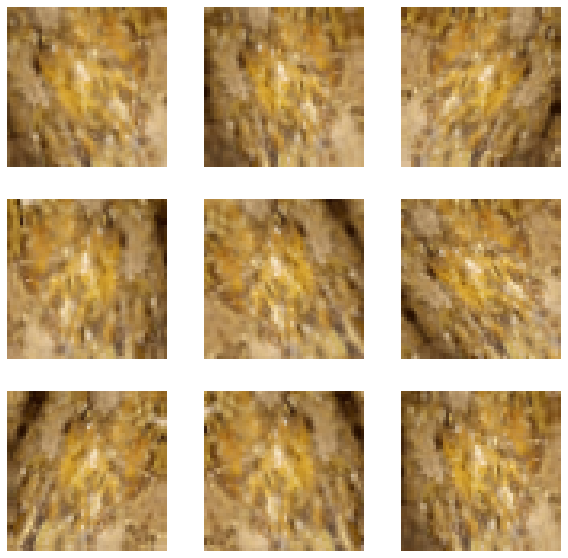

In [ ]:
# visualization of Augmented data
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
from keras.backend import relu
# Developing a model
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile and Training the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Structure of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 50, 50, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

In [ ]:
epochs=11
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/11
178/178 [==============================] - 176s 927ms/step - loss: 0.6508 - accuracy: 0.7378 - val_loss: 0.5772 - val_accuracy: 0.8008
Epoch 2/11
178/178 [==============================] - 6s 34ms/step - loss: 0.4341 - accuracy: 0.8308 - val_loss: 0.7903 - val_accuracy: 0.6820
Epoch 3/11
178/178 [==============================] - 6s 34ms/step - loss: 0.3589 - accuracy: 0.8658 - val_loss: 0.4356 - val_accuracy: 0.8429
Epoch 4/11
178/178 [==============================] - 6s 34ms/step - loss: 0.3104 - accuracy: 0.8858 - val_loss: 0.4947 - val_accuracy: 0.8352
Epoch 5/11
178/178 [==============================] - 6s 34ms/step - loss: 0.2874 - accuracy: 0.8926 - val_loss: 0.3740 - val_accuracy: 0.8467
Epoch 6/11
178/178 [==============================] - 6s 34ms/step - loss: 0.2602 - accuracy: 0.9033 - val_loss: 0.3389 - val_accuracy: 0.8736
Epoch 7/11
178/178 [==============================] - 6s 34ms/step - loss: 0.2486 - accuracy: 0.9109 - val_loss: 0.3636 - val_accuracy: 0.8

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 50, 50, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

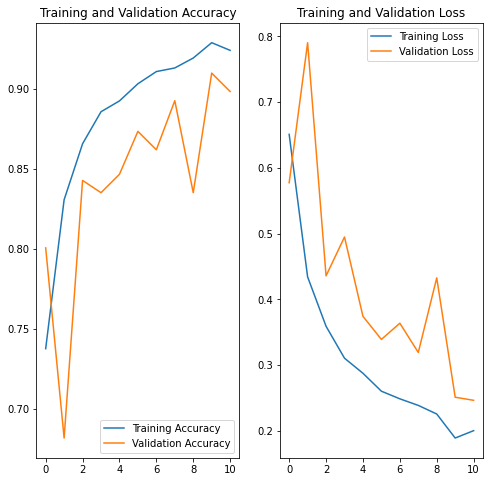

In [ ]:
# Visualizing the Training and Validation Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_ds)

82/82 [==============================] - 140s 2s/step - loss: 0.1870 - accuracy: 0.9368


[0.18697410821914673, 0.936771035194397]

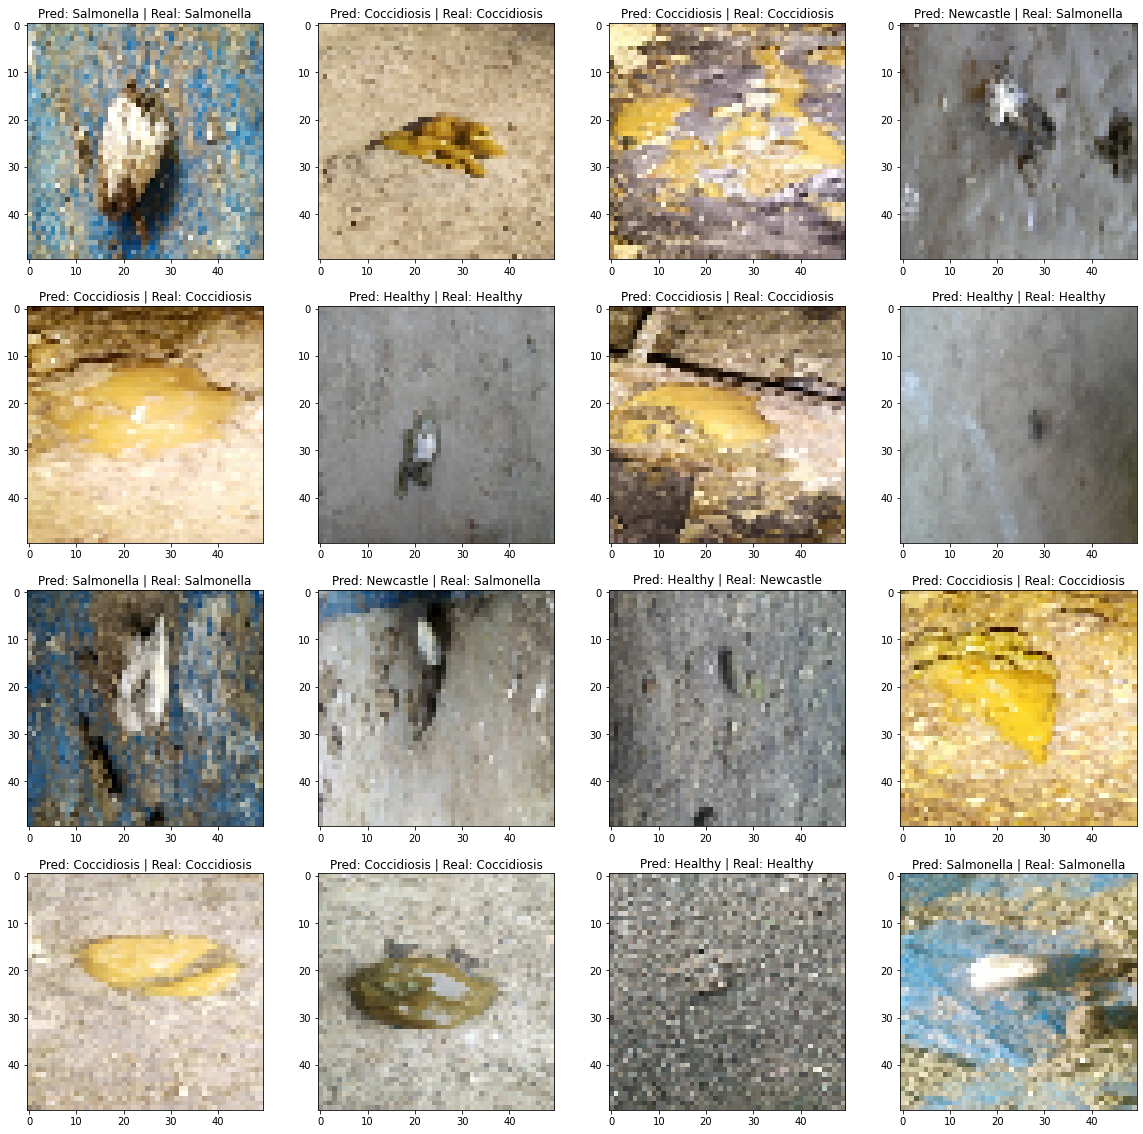

In [ ]:
import numpy

plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

82/82 - 2s - loss: 0.1870 - accuracy: 0.9368 - 2s/epoch - 27ms/step


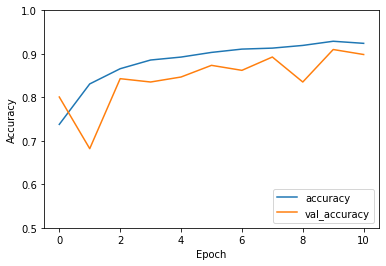

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)